# IMPORT NECESSARY LIBRARIES

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# LOADING DATA FROM SPX FILE AND USING DATE AS INDEX

In [42]:
df_SPX = pd.read_csv('https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/SPX.csv',
                     index_col='Date', parse_dates=True)

# Use the dtypes attribute to check what types are in each column
# the word 'object' is used to denote a string
print(df_SPX.dtypes)

df_SPX.head()

Price       object
Open        object
High        object
Low         object
Change %    object
dtype: object


,Price,Open,High,Low,Change %
Date,,,,,
2017-12-29,"2,673.61","2,689.15","2,692.12","2,673.61",-0.52%
2017-12-28,"2,687.54","2,686.10","2,687.66","2,682.69",0.18%
2017-12-27,"2,682.62","2,682.10","2,685.64","2,678.91",0.08%
2017-12-26,"2,680.50","2,679.09","2,682.74","2,677.96",-0.11%
2017-12-22,"2,683.34","2,684.22","2,685.35","2,678.13",-0.05%


# CONVERTING DATA INTO NUMERICAL DATATYPE

In [43]:
df_SPX.dtypes

Price       object
Open        object
High        object
Low         object
Change %    object
dtype: object

In [46]:
df_SPX['Change %']=pd.to_numeric(df_SPX['Change %'].str.replace('%',''))

# APPROACH 2 TO CONVERT DATA INTO NUMERICAL DATATYPE

In [44]:
df_SPX[['Open','High','Low','Price']]=df_SPX[['Open','High','Low','Price']].apply(lambda x:pd.to_numeric(x.replace('\,','',regex=True)))

In [47]:
df_SPX.dtypes

Price       float64
Open        float64
High        float64
Low         float64
Change %    float64
dtype: object

# SORT ROWS IN CHRONOLOGICAL ORDER

In [48]:
df_SPX.sort_values(by='Date',inplace=True)
df_SPX.head()

# PLOT LINE CHART

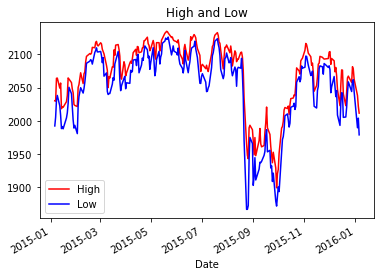

In [53]:
queryRows='Date >= "01-06-2015" and Date<= "01-06-2016"'
cols=['High','Low']
df_SPX.query(queryRows)[cols].plot(kind='line',color=['red','blue'],title='High and Low')

# FIND THE MIN,MAX,AVERAGE
- Determined the above statistical metrics for each numerical by grouping the data in terms of other other attributes hierarchially

In [62]:
funcs=['mean','min','max']
display(df_SPX.groupby(['Date','Price','Open','High','Low']).agg(funcs))
display(df_SPX.groupby(['Date','Price','Open','High','Change %']).agg(funcs))
display(df_SPX.groupby(['Date','Price','Open','Low','Change %']).agg(funcs))
display(df_SPX.groupby(['Date','Price','High','Low','Change %']).agg(funcs))
display(df_SPX.groupby(['Date','High','Open','Low','Change %']).agg(funcs))

Change %            
                                               mean   min   max
Date       Price   Open    High    Low                         
2006-01-04 1273.46 1268.80 1275.37 1267.74     0.37  0.37  0.37
2006-01-05 1273.48 1273.46 1276.91 1270.30     0.00  0.00  0.00
2006-01-06 1285.45 1273.48 1286.09 1273.48     0.94  0.94  0.94
2006-01-09 1290.15 1285.45 1290.78 1284.82     0.37  0.37  0.37
2006-01-10 1289.69 1290.15 1290.15 1283.76    -0.04 -0.04 -0.04
...                                             ...   ...   ...
2017-12-22 2683.34 2684.22 2685.35 2678.13    -0.05 -0.05 -0.05
2017-12-26 2680.50 2679.09 2682.74 2677.96    -0.11 -0.11 -0.11
2017-12-27 2682.62 2682.10 2685.64 2678.91     0.08  0.08  0.08
2017-12-28 2687.54 2686.10 2687.66 2682.69     0.18  0.18  0.18
2017-12-29 2673.61 2689.15 2692.12 2673.61    -0.52 -0.52 -0.52

[3017 rows x 3 columns]

Low                  
                                                mean      min      max
Date       Price   Open    High    Change %                           
2006-01-04 1273.46 1268.80 1275.37  0.37     1267.74  1267.74  1267.74
2006-01-05 1273.48 1273.46 1276.91  0.00     1270.30  1270.30  1270.30
2006-01-06 1285.45 1273.48 1286.09  0.94     1273.48  1273.48  1273.48
2006-01-09 1290.15 1285.45 1290.78  0.37     1284.82  1284.82  1284.82
2006-01-10 1289.69 1290.15 1290.15 -0.04     1283.76  1283.76  1283.76
...                                              ...      ...      ...
2017-12-22 2683.34 2684.22 2685.35 -0.05     2678.13  2678.13  2678.13
2017-12-26 2680.50 2679.09 2682.74 -0.11     2677.96  2677.96  2677.96
2017-12-27 2682.62 2682.10 2685.64  0.08     2678.91  2678.91  2678.91
2017-12-28 2687.54 2686.10 2687.66  0.18     2682.69  2682.69  2682.69
2017-12-29 2673.61 2689.15 2692.12 -0.52     2673.61  2673.61  2673.61

[3017 rows x 3 columns]

High                  
                                                mean      min      max
Date       Price   Open    Low     Change %                           
2006-01-04 1273.46 1268.80 1267.74  0.37     1275.37  1275.37  1275.37
2006-01-05 1273.48 1273.46 1270.30  0.00     1276.91  1276.91  1276.91
2006-01-06 1285.45 1273.48 1273.48  0.94     1286.09  1286.09  1286.09
2006-01-09 1290.15 1285.45 1284.82  0.37     1290.78  1290.78  1290.78
2006-01-10 1289.69 1290.15 1283.76 -0.04     1290.15  1290.15  1290.15
...                                              ...      ...      ...
2017-12-22 2683.34 2684.22 2678.13 -0.05     2685.35  2685.35  2685.35
2017-12-26 2680.50 2679.09 2677.96 -0.11     2682.74  2682.74  2682.74
2017-12-27 2682.62 2682.10 2678.91  0.08     2685.64  2685.64  2685.64
2017-12-28 2687.54 2686.10 2682.69  0.18     2687.66  2687.66  2687.66
2017-12-29 2673.61 2689.15 2673.61 -0.52     2692.12  2692.12  2692.12

[3017 rows x 3 columns]

Open                  
                                                mean      min      max
Date       Price   High    Low     Change %                           
2006-01-04 1273.46 1275.37 1267.74  0.37     1268.80  1268.80  1268.80
2006-01-05 1273.48 1276.91 1270.30  0.00     1273.46  1273.46  1273.46
2006-01-06 1285.45 1286.09 1273.48  0.94     1273.48  1273.48  1273.48
2006-01-09 1290.15 1290.78 1284.82  0.37     1285.45  1285.45  1285.45
2006-01-10 1289.69 1290.15 1283.76 -0.04     1290.15  1290.15  1290.15
...                                              ...      ...      ...
2017-12-22 2683.34 2685.35 2678.13 -0.05     2684.22  2684.22  2684.22
2017-12-26 2680.50 2682.74 2677.96 -0.11     2679.09  2679.09  2679.09
2017-12-27 2682.62 2685.64 2678.91  0.08     2682.10  2682.10  2682.10
2017-12-28 2687.54 2687.66 2682.69  0.18     2686.10  2686.10  2686.10
2017-12-29 2673.61 2692.12 2673.61 -0.52     2689.15  2689.15  2689.15

[3017 rows x 3 columns]

Price                  
                                                mean      min      max
Date       High    Open    Low     Change %                           
2006-01-04 1275.37 1268.80 1267.74  0.37     1273.46  1273.46  1273.46
2006-01-05 1276.91 1273.46 1270.30  0.00     1273.48  1273.48  1273.48
2006-01-06 1286.09 1273.48 1273.48  0.94     1285.45  1285.45  1285.45
2006-01-09 1290.78 1285.45 1284.82  0.37     1290.15  1290.15  1290.15
2006-01-10 1290.15 1290.15 1283.76 -0.04     1289.69  1289.69  1289.69
...                                              ...      ...      ...
2017-12-22 2685.35 2684.22 2678.13 -0.05     2683.34  2683.34  2683.34
2017-12-26 2682.74 2679.09 2677.96 -0.11     2680.50  2680.50  2680.50
2017-12-27 2685.64 2682.10 2678.91  0.08     2682.62  2682.62  2682.62
2017-12-28 2687.66 2686.10 2682.69  0.18     2687.54  2687.54  2687.54
2017-12-29 2692.12 2689.15 2673.61 -0.52     2673.61  2673.61  2673.61

[3017 rows x 3 columns]

# BONUS- SCATTER PLOT WITH COLOR MAP TO COMPARE THE PRICE AND HIGH OF STOCKS IN THE PERIOD  2016- 2017

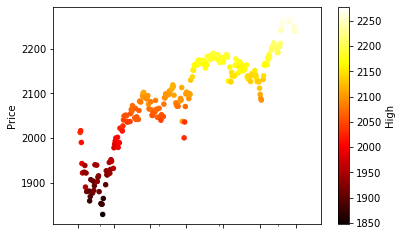

In [100]:
df2=df_SPX.reset_index()
df2['Date']=pd.to_datetime(df2['Date'])
#df_SPX['Price'].plot.hist(x = 'Date',bins=50)
df2[(df2['Date']>'01-01-2016') & (df2['Date']<'01-01-2017')].plot.scatter(x='Date', y='Price', c='High', cmap='hot')